### Problem statement


### QuadPay is a payment gateway that lets consumers split purchases into 4 interest free installments, every two weeks. The first 25% is taken when the order is received, and the remaining 3 installments of 25% are automatically taken every 14 days. We help customers manage their cash-flow and we help merchants increase conversion rates and average order values.

##### This assignment is designed to help you become familiar with our problem domain and start to think about which scenarios we should anticipate going forward. It gives us an opportunity to evaluate how you approach complex problems.

#### Training data

Orders.csv contains an anonymized set of customer orders, labelled with details about which installments the customer paid. It has the following columns:


● order_id : String

● customer_id : String

● merchant_id : String

● order_amount : Decimal


● checkout_started_at : Datetime

● credit_decision_started_at : Datetime

● approved_for_installments: Boolean

● customer_credit_score: Integer

● customer_age : Integer

● customer_billing_zip : String

● customer_shipping_zip : String

● paid_installment_1 : Boolean

● paid_installment_2 : Boolean

● paid_installment_3 : Boolean

● paid_installment_4 : Boolean

In [119]:
# Importing the datasets


import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, fbeta_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from collections import Counter

In [120]:
df = pd.read_excel(r'D:\New_folder\orders_modified1.xlsx')
df

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,checkout_started_at.1,checkout_started_at_AUG,checkout_started_at_SEP,checkout_started_at_NOV,credit_decision_started_at,...,Customer_age_BT21_40,Customer_age_BT41_60,Customer_age_GT60,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,target_column
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18,10,0,0,1,2018-10-03 14:26:18.997,...,1,0,0,95407,95407,1,1,1,1,1
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03,9,0,1,0,2018-09-21 16:55:05.100,...,0,0,0,85007,85007,1,1,1,1,1
2,381AFF,793FE0,252600000000,45.00,2018-09-15 13:41:46,9,0,1,0,2018-09-15 13:41:47.197,...,0,1,0,30305-2646,30305-2646,1,1,1,1,1
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:26,10,0,0,1,2018-10-10 00:59:26.123,...,1,0,0,28562,28562,1,1,1,1,1
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:09,9,0,1,0,2018-09-12 22:53:10.923,...,0,0,0,92324,92324,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,17CAD0,A00DCD,26ECA2,63.66,2018-08-29 01:09:44,8,1,0,0,2018-08-29 01:09:45.343,...,1,0,0,60134,60134,1,1,1,1,1
9996,BAD8F0,8F5B50,9C0B17,83.89,2018-09-15 15:34:31,9,0,1,0,2018-09-15 15:34:31.723,...,1,0,0,10923,10923,1,1,1,1,1
9997,70DEB3,BC35EC,268696,95.25,2018-10-05 18:04:20,10,0,0,1,2018-10-05 18:04:20.773,...,0,1,0,60636,60636,1,1,1,1,1
9998,62754,476671,C37828,79.95,2018-09-21 19:47:59,9,0,1,0,2018-09-21 19:48:00.650,...,0,0,0,87021,87021,1,1,1,1,1


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   order_id                    10000 non-null  object        
 1   customer_id                 10000 non-null  object        
 2   merchant_id                 10000 non-null  object        
 3   order_amount                10000 non-null  float64       
 4   checkout_started_at         10000 non-null  datetime64[ns]
 5   checkout_started_at.1       10000 non-null  int64         
 6   checkout_started_at_AUG     10000 non-null  int64         
 7   checkout_started_at_SEP     10000 non-null  int64         
 8   checkout_started_at_NOV     10000 non-null  int64         
 9   credit_decision_started_at  10000 non-null  datetime64[ns]
 10  approved_for_installments   10000 non-null  bool          
 11  customer_credit_score       10000 non-null  int64      

In [122]:
df.head()

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,checkout_started_at.1,checkout_started_at_AUG,checkout_started_at_SEP,checkout_started_at_NOV,credit_decision_started_at,...,Customer_age_BT21_40,Customer_age_BT41_60,Customer_age_GT60,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,target_column
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18,10,0,0,1,2018-10-03 14:26:18.997,...,1,0,0,95407,95407,1,1,1,1,1
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03,9,0,1,0,2018-09-21 16:55:05.100,...,0,0,0,85007,85007,1,1,1,1,1
2,381AFF,793FE0,252600000000,45.00,2018-09-15 13:41:46,9,0,1,0,2018-09-15 13:41:47.197,...,0,1,0,30305-2646,30305-2646,1,1,1,1,1
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:26,10,0,0,1,2018-10-10 00:59:26.123,...,1,0,0,28562,28562,1,1,1,1,1
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:09,9,0,1,0,2018-09-12 22:53:10.923,...,0,0,0,92324,92324,1,1,1,1,1


 ##   Note: "1" are paid installments in all 4,  whereas "0" is not paid installments in either one of the installment.. 

In [123]:
df.describe()

,order_amount,checkout_started_at.1,checkout_started_at_AUG,checkout_started_at_SEP,checkout_started_at_NOV,customer_credit_score,customer_age,Customer_age_LT20,Customer_age_BT21_40,Customer_age_BT41_60,Customer_age_GT60,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,target_column
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000
mean,146.252272,9.289400,0.071700,0.567200,0.361100,613.435900,33.544300,0.086400,0.663600,0.210000,0.040000,1.0,0.977900,0.959700,0.943800,0.930600
std,167.883106,0.590832,0.258003,0.495488,0.480343,92.555118,11.933729,0.280968,0.472501,0.407329,0.195969,0.0,0.147016,0.196672,0.230319,0.254146
min,4.950000,8.000000,0.000000,0.000000,0.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,64.000000,9.000000,0.000000,0.000000,0.000000,562.000000,24.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000
50%,90.765000,9.000000,0.000000,1.000000,0.000000,611.000000,30.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000
75%,155.000000,10.000000,0.000000,1.000000,1.000000,664.000000,40.250000,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000
max,1936.000000,10.000000,1.000000,1.000000,1.000000,836.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [124]:
df.head()

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,checkout_started_at.1,checkout_started_at_AUG,checkout_started_at_SEP,checkout_started_at_NOV,credit_decision_started_at,...,Customer_age_BT21_40,Customer_age_BT41_60,Customer_age_GT60,customer_billing_zip,customer_shipping_zip,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,target_column
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18,10,0,0,1,2018-10-03 14:26:18.997,...,1,0,0,95407,95407,1,1,1,1,1
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03,9,0,1,0,2018-09-21 16:55:05.100,...,0,0,0,85007,85007,1,1,1,1,1
2,381AFF,793FE0,252600000000,45.00,2018-09-15 13:41:46,9,0,1,0,2018-09-15 13:41:47.197,...,0,1,0,30305-2646,30305-2646,1,1,1,1,1
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:26,10,0,0,1,2018-10-10 00:59:26.123,...,1,0,0,28562,28562,1,1,1,1,1
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:09,9,0,1,0,2018-09-12 22:53:10.923,...,0,0,0,92324,92324,1,1,1,1,1


In [125]:
# Dropping Columns


drop_cols = df.drop(['approved_for_installments','customer_billing_zip', 'customer_shipping_zip','checkout_started_at.1'], 1, inplace=True)

In [126]:
df

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,checkout_started_at_AUG,checkout_started_at_SEP,checkout_started_at_NOV,credit_decision_started_at,customer_credit_score,customer_age,Customer_age_LT20,Customer_age_BT21_40,Customer_age_BT41_60,Customer_age_GT60,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,target_column
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18,0,0,1,2018-10-03 14:26:18.997,626,26,0,1,0,0,1,1,1,1,1
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03,0,1,0,2018-09-21 16:55:05.100,603,20,1,0,0,0,1,1,1,1,1
2,381AFF,793FE0,252600000000,45.00,2018-09-15 13:41:46,0,1,0,2018-09-15 13:41:47.197,648,41,0,0,1,0,1,1,1,1,1
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:26,0,0,1,2018-10-10 00:59:26.123,625,33,0,1,0,0,1,1,1,1,1
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:09,0,1,0,2018-09-12 22:53:10.923,438,18,1,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,17CAD0,A00DCD,26ECA2,63.66,2018-08-29 01:09:44,1,0,0,2018-08-29 01:09:45.343,613,37,0,1,0,0,1,1,1,1,1
9996,BAD8F0,8F5B50,9C0B17,83.89,2018-09-15 15:34:31,0,1,0,2018-09-15 15:34:31.723,771,34,0,1,0,0,1,1,1,1,1
9997,70DEB3,BC35EC,268696,95.25,2018-10-05 18:04:20,0,0,1,2018-10-05 18:04:20.773,611,45,0,0,1,0,1,1,1,1,1
9998,62754,476671,C37828,79.95,2018-09-21 19:47:59,0,1,0,2018-09-21 19:48:00.650,611,18,1,0,0,0,1,1,1,1,1


In [127]:
df['target_column'].unique()

array([1, 0], dtype=int64)

In [128]:
df.isnull().sum()

order_id                      0
customer_id                   0
merchant_id                   0
order_amount                  0
checkout_started_at           0
checkout_started_at_AUG       0
checkout_started_at_SEP       0
checkout_started_at_NOV       0
credit_decision_started_at    0
customer_credit_score         0
customer_age                  0
Customer_age_LT20             0
Customer_age_BT21_40          0
Customer_age_BT41_60          0
Customer_age_GT60             0
paid_installment_1            0
paid_installment_2            0
paid_installment_3            0
paid_installment_4            0
target_column                 0
dtype: int64

## Summarize and Visualize  for Exploratory Data Analysis

## Finding customers less than 20 who paid and not paid installments properly

#  "1" are paid installments in all 4,  whereas "0" is not paid installments in either 1. 

In [129]:
df_age_LT20= df.groupby(["Customer_age_LT20"])['target_column'].count()
df_age_LT20.columns=['Customer_age_LT20', 'Not paid installments']
df_age_LT20

Customer_age_LT20
0    9136
1     864
Name: target_column, dtype: int64

Text(0.5, 1.0, 'Customer age Less than 20 whether they paid installments or not')

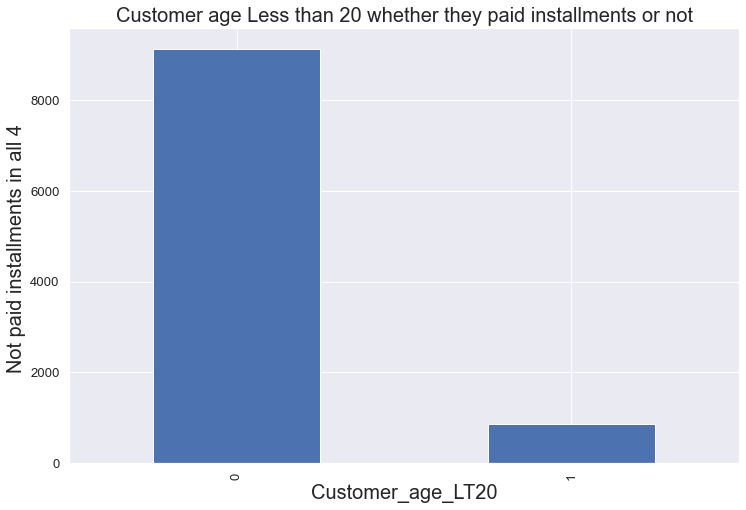

In [131]:
df_age_LT20.plot(x='Customer_age_LT20', y='not paid installments in all 4', kind='bar')
plt.xlabel('Customer_age_LT20',fontsize=20)
plt.ylabel('Not paid installments in all 4 ',fontsize=20)
plt.title('Customer age Less than 20 whether they paid installments or not',fontsize=20)

#### Customer age Less Than 20 has 9136 paid and 864 Not paid their installments

1.     paid    9136
2.  Not paid    864

## Finding customers greater than 60 who paid and not paid installments properly

####  "1' are paid installments in all 4,  whereas "0" is not paid installments in either 1. 

In [132]:
df_age_GT60= df.groupby(["Customer_age_GT60"])['target_column'].count()
df_age_GT60.columns=['Customer_age_GT60', 'paid installments in all 4']
df_age_GT60

Customer_age_GT60
0    9600
1     400
Name: target_column, dtype: int64

Text(0.5, 1.0, 'Customer age greater than 60 whether they paid installments or not')

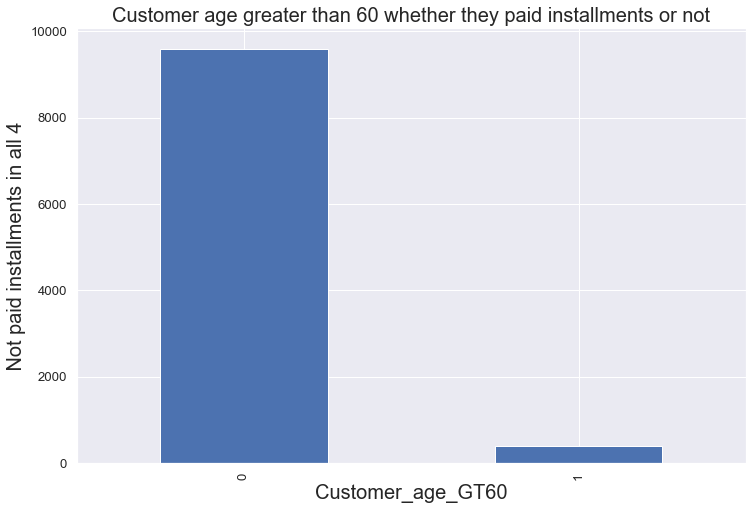

In [133]:
df_age_GT60.plot(x='Customer_age_GT60', y='paid installments in all 4', kind='bar')
plt.xlabel('Customer_age_GT60',fontsize=20)
plt.ylabel(' Not paid installments in all 4 ',fontsize=20)
plt.title('Customer age greater than 60 whether they paid installments or not',fontsize=20)

#### Customer age greater Than 60  has 9600 paid and 400 Not paid their installments

Customer_age_GT60

 paid   9600
 
 Not paid     400

## Finding customers between than 21-40 who paid and not paid installments properly

####  "1" are paid installments in all 4,  whereas "0" is not paid installments in either 1. 

In [134]:
df_age_BT21_40= df.groupby(["Customer_age_BT21_40"])['target_column'].count()
df_age_BT21_40.columns=['Customer_age_BT21_40', 'paid installments in all 4']
df_age_BT21_40

Customer_age_BT21_40
0    3364
1    6636
Name: target_column, dtype: int64

Text(0.5, 1.0, 'Customer age between 21 to 40 whether they paid installments or not')

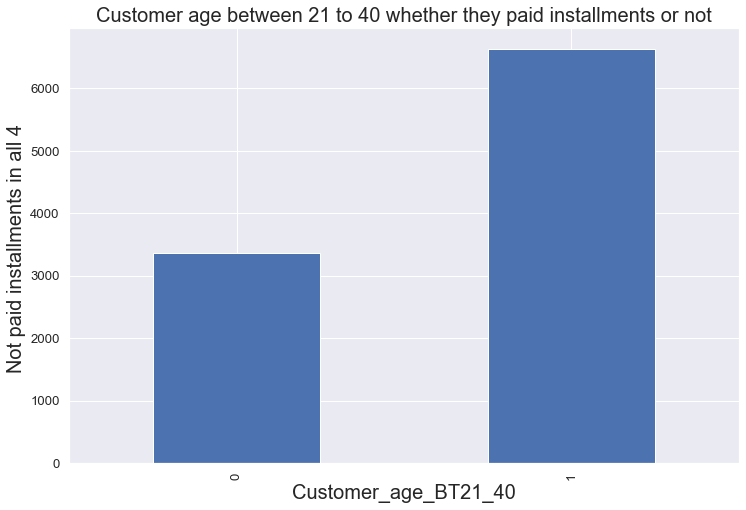

In [135]:
df_age_BT21_40.plot(x='Customer_age_BT21_40', y='paid installments in all 4', kind='bar')
plt.xlabel('Customer_age_BT21_40',fontsize=20)
plt.ylabel('Not paid installments in all 4 ',fontsize=20)
plt.title('Customer age between 21 to 40 whether they paid installments or not',fontsize=20)

#### Customer age between 21-40  has 3364 paid and 6636 Not paid their installments

Customer_age_BT21_40

1   3364

0   6636


### This shows that customers between 21-40 are not paying the installments properly

## Finding customers between than 41-60 who paid and not paid installments properly

####  "1" are paid installments in all 4,  whereas "0" is not paid installments in either 1. 

In [136]:
df_age_BT41_60= df.groupby(["Customer_age_BT41_60"])['target_column'].count()
df_age_BT41_60.columns=['Customer_age_BT41_60', 'Not paid installments in all 4']
df_age_BT41_60

Customer_age_BT41_60
0    7900
1    2100
Name: target_column, dtype: int64

Text(0.5, 1.0, 'Customer age between 41 to 60 whether they paid installments or not')

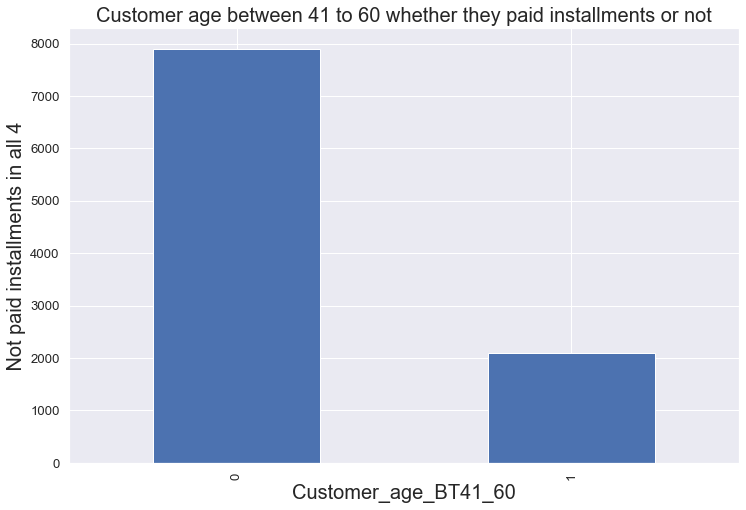

In [137]:
df_age_BT41_60.plot(x='Customer_age_BT41_60', y='Not paid installments in all 4', kind='bar')
plt.xlabel('Customer_age_BT41_60',fontsize=20)
plt.ylabel(' Not paid installments in all 4 ',fontsize=20)
plt.title('Customer age between 41 to 60 whether they paid installments or not',fontsize=20)

#### Customer age between 41-60  has 7900 paid and 2100 Not paid their installments

Customer_age_BT41_60

1   7900


0    2100


### This shows that customer ages between 41-60 are not paying the installments properly after 21-40 age 

## Finding the month which has lease installments paid by the customers

####  "1" are paid installments in all 4,  whereas "0" is not paid installments in either 1. 

#### customer_age vs defaulted

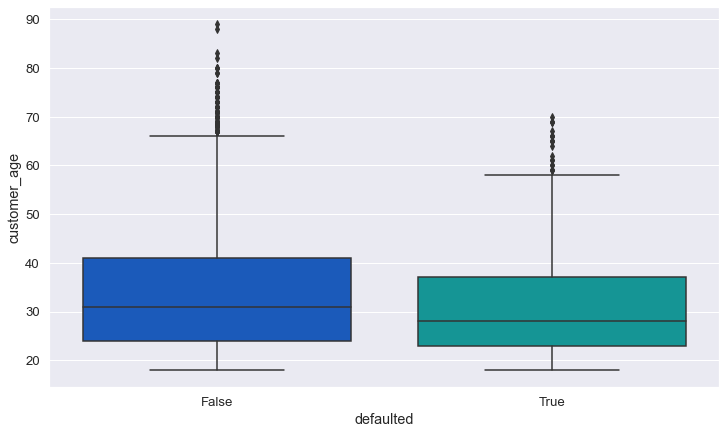

In [139]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='defaulted',y='customer_age',data=filtered_orders,palette='winter')
plt.show()

#### customer_credit_score vs defaulted

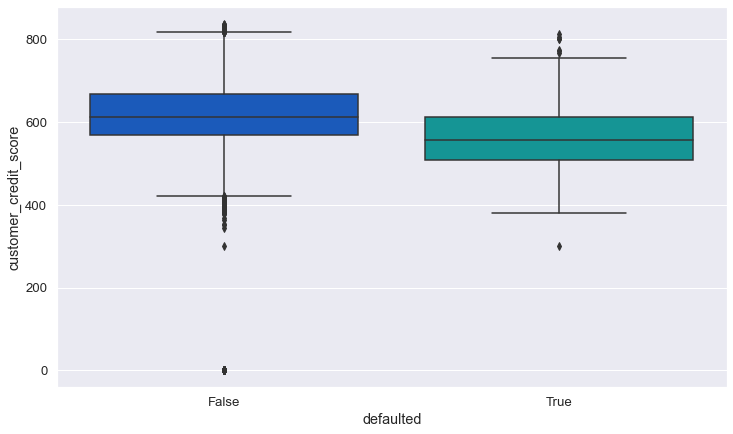

In [140]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='defaulted',y='customer_credit_score',data=filtered_orders,palette='winter')
plt.show()

In [25]:
df

,order_id,customer_id,merchant_id,order_amount,checkout_started_at,checkout_started_at_AUG,checkout_started_at_SEP,checkout_started_at_NOV,credit_decision_started_at,customer_credit_score,customer_age,Customer_age_LT20,Customer_age_BT21_40,Customer_age_BT41_60,Customer_age_GT60,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,target_column
0,42C39B,9D74A0,6881F9,147.20,2018-10-03 14:26:18,0,0,1,2018-10-03 14:26:18.997,626,26,0,1,0,0,1,1,1,1,0
1,A19AC4,2629AB,C37828,69.95,2018-09-21 16:55:03,0,1,0,2018-09-21 16:55:05.100,603,20,1,0,0,0,1,1,1,1,0
2,381AFF,793FE0,252600000000,45.00,2018-09-15 13:41:46,0,1,0,2018-09-15 13:41:47.197,648,41,0,0,1,0,1,1,1,1,0
3,3184A3,22C696,24FBAF,164.00,2018-10-10 00:59:26,0,0,1,2018-10-10 00:59:26.123,625,33,0,1,0,0,1,1,1,1,0
4,237711,D4E94A,6F498E,69.17,2018-09-12 22:53:09,0,1,0,2018-09-12 22:53:10.923,438,18,1,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,17CAD0,A00DCD,26ECA2,63.66,2018-08-29 01:09:44,1,0,0,2018-08-29 01:09:45.343,613,37,0,1,0,0,1,1,1,1,0
9996,BAD8F0,8F5B50,9C0B17,83.89,2018-09-15 15:34:31,0,1,0,2018-09-15 15:34:31.723,771,34,0,1,0,0,1,1,1,1,0
9997,70DEB3,BC35EC,268696,95.25,2018-10-05 18:04:20,0,0,1,2018-10-05 18:04:20.773,611,45,0,0,1,0,1,1,1,1,0
9998,62754,476671,C37828,79.95,2018-09-21 19:47:59,0,1,0,2018-09-21 19:48:00.650,611,18,1,0,0,0,1,1,1,1,0


#### AUGUST Month 

In [141]:
df_month_aug= df.groupby(["checkout_started_at_AUG"])['target_column'].count()
df_month_aug.columns=['checkout_started_at_AUG', 'Not paid installments in all 4']
df_month_aug

checkout_started_at_AUG
0    9283
1     717
Name: target_column, dtype: int64

Text(0.5, 1.0, 'Customer not paid installed on month of Aug')

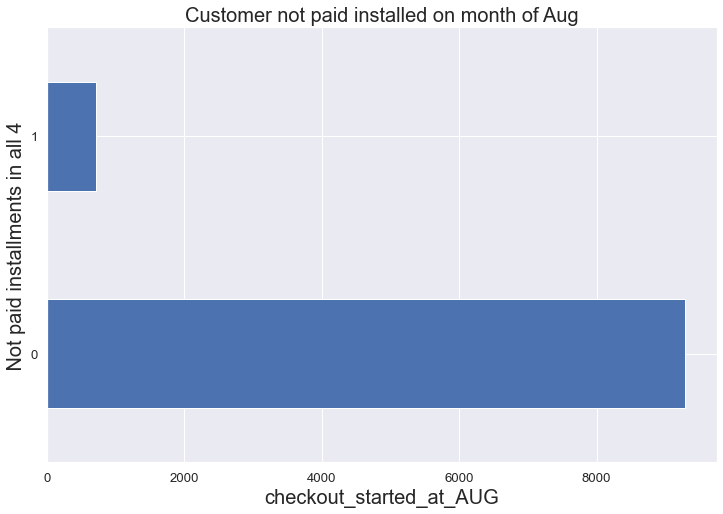

In [142]:
df_month_aug.plot(x='checkout_started_at_AUG', y='Not paid installments in all 4', kind='barh')
plt.xlabel('checkout_started_at_AUG',fontsize=20)
plt.ylabel(' Not paid installments in all 4 ',fontsize=20)
plt.title('Customer not paid installed on month of Aug',fontsize=20)

#### September Month 

In [144]:
df_month_sep= df.groupby(["checkout_started_at_SEP"])['target_column'].count()
df_month_sep.columns=['checkout_started_at_SEP', 'Not paid installments in all 4']
df_month_sep

checkout_started_at_SEP
0    4328
1    5672
Name: target_column, dtype: int64

Text(0.5, 1.0, 'Customer not paid installed on month of Sep')

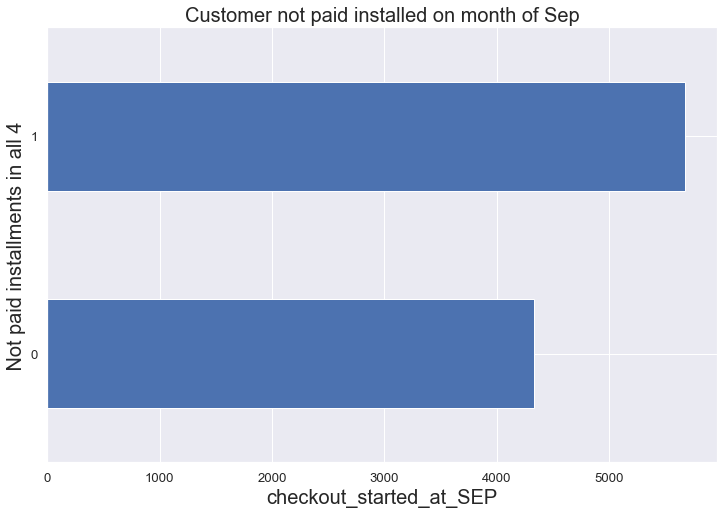

In [145]:
df_month_sep.plot(x='checkout_started_at_SEP', y='Not paid installments in all 4', kind='barh')
plt.xlabel('checkout_started_at_SEP',fontsize=20)
plt.ylabel(' Not paid installments in all 4 ',fontsize=20)
plt.title('Customer not paid installed on month of Sep',fontsize=20)

#### October Month 

In [146]:
df_month_oct= df.groupby(["checkout_started_at_NOV"])['target_column'].count()
df_month_oct.columns=['checkout_started_at_NOV', 'Not paid installments in all 4']
df_month_oct

checkout_started_at_NOV
0    6389
1    3611
Name: target_column, dtype: int64

Text(0.5, 1.0, 'Customer not paid installed on month of Oct')

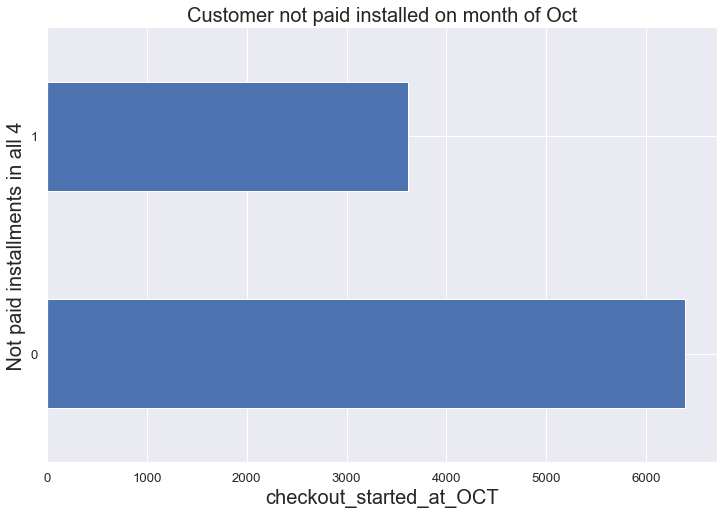

In [147]:
df_month_oct.plot(x='checkout_started_at_NOV', y='Not paid installments in all 4', kind='barh')
plt.xlabel('checkout_started_at_OCT',fontsize=20)
plt.ylabel(' Not paid installments in all 4 ',fontsize=20)
plt.title('Customer not paid installed on month of Oct',fontsize=20)

### this bar graph shows that in the month of September Customers are not payed the installments much

In [148]:
# fill missing values as 'benefit of doubt' paid for our purposes
filtered_orders = df


filtered_orders['paid_installment_1'] = filtered_orders['paid_installment_1'].fillna(1.0)
filtered_orders['paid_installment_3'] = filtered_orders['paid_installment_3'].fillna(1.0)



In [149]:
# add 'defaulted' column and make True if paid_installment_1-4 are Not Null and unpaid

def label_defaulted(row):
    res = False
    for i in range(1,5):
        # only take into account paid_installment_4 if it is not NaN
        if row['paid_installment_{}'.format(i)] == 0.0:
          res = True
    return res

In [150]:
filtered_orders['defaulted'] = filtered_orders.apply(lambda row: label_defaulted(row), axis=1)

C:\Users\e3015558\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


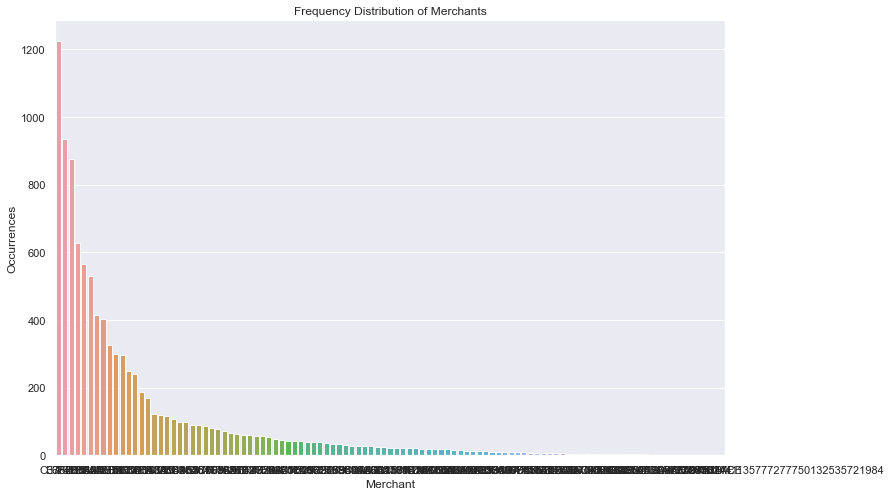

C37828    1224
E3FFE5     934
6F498E     876
26ECA2     627
8D665E     565
          ... 
E00757       1
A99A2B       1
983DD1       1
1561AE       1
B847CE       1
Name: merchant_id, Length: 105, dtype: int64


In [151]:
merchant_count = filtered_orders['merchant_id'].value_counts()
sns.set(style="darkgrid")
sns.barplot(merchant_count.index, merchant_count.values, alpha=0.9)
plt.title('Frequency Distribution of Merchants')
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('Merchant', fontsize=12)
plt.show()
print(filtered_orders['merchant_id'].value_counts())

In [152]:
## dummy vars for categoricals
order_id = pd.get_dummies(filtered_orders['order_id'],drop_first=True)
customer_id = pd.get_dummies(filtered_orders['customer_id'],drop_first=True)
merchant_id = pd.get_dummies(filtered_orders['merchant_id'],drop_first=True)
checkout = pd.get_dummies(filtered_orders['checkout_started_at'],drop_first=True)
decision = pd.get_dummies(filtered_orders['credit_decision_started_at'],drop_first=True)
filtered_orders.drop(['order_id', 'customer_id', 'merchant_id', 'checkout_started_at', 'credit_decision_started_at'],axis=1,inplace=True)
filtered_orders = pd.concat([filtered_orders, order_id, customer_id, merchant_id, checkout, decision],axis=1)
filtered_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 39017 entries, order_amount to 2018-10-14 23:56:29.583000
dtypes: bool(1), float64(1), int64(14), uint8(39001)
memory usage: 373.1 MB


In [ ]:
#filtered_orders.to_csv(r'D:\New_folder\cleaned_orders2.csv',index=False)

### Defaulted Percentage

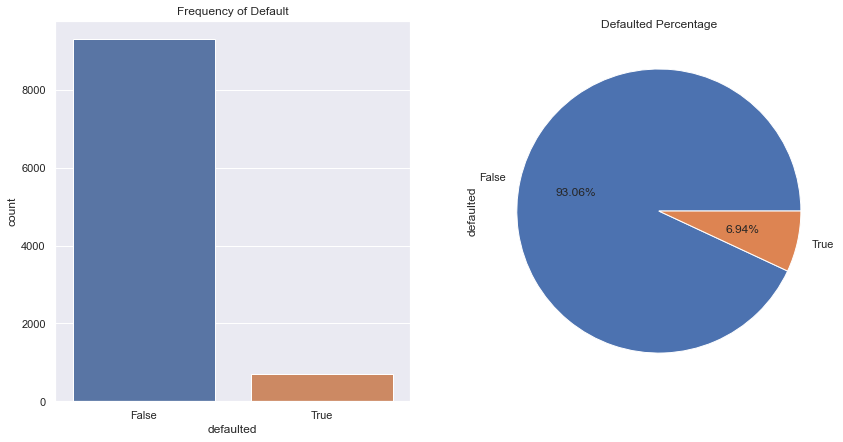

In [153]:
# Defaulted Percentage

fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='defaulted', data=filtered_orders,ax=axs[0])
axs[0].set_title("Frequency of Default")
filtered_orders.defaulted.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Defaulted Percentage")
plt.show()


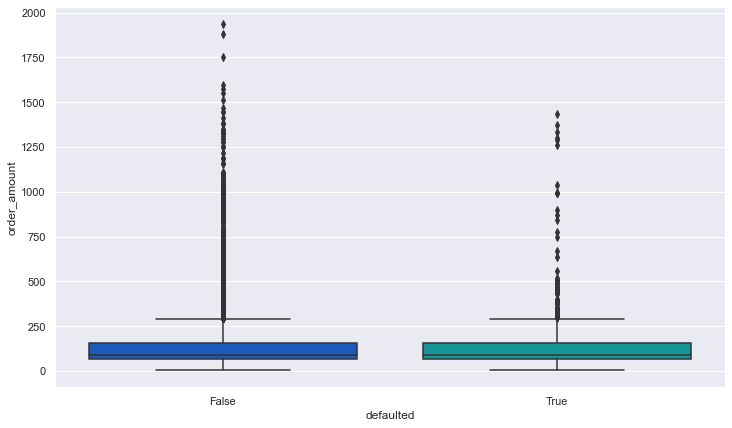

In [154]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='defaulted',y='order_amount',data=filtered_orders,palette='winter')
plt.show()


In [155]:
df

,order_amount,checkout_started_at_AUG,checkout_started_at_SEP,checkout_started_at_NOV,customer_credit_score,customer_age,Customer_age_LT20,Customer_age_BT21_40,Customer_age_BT41_60,Customer_age_GT60,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,target_column,defaulted
0,147.20,0,0,1,626,26,0,1,0,0,1,1,1,1,1,False
1,69.95,0,1,0,603,20,1,0,0,0,1,1,1,1,1,False
2,45.00,0,1,0,648,41,0,0,1,0,1,1,1,1,1,False
3,164.00,0,0,1,625,33,0,1,0,0,1,1,1,1,1,False
4,69.17,0,1,0,438,18,1,0,0,0,1,1,1,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,63.66,1,0,0,613,37,0,1,0,0,1,1,1,1,1,False
9996,83.89,0,1,0,771,34,0,1,0,0,1,1,1,1,1,False
9997,95.25,0,0,1,611,45,0,0,1,0,1,1,1,1,1,False
9998,79.95,0,1,0,611,18,1,0,0,0,1,1,1,1,1,False


### Train and Test Split


In [156]:
#x = df.drop('Attrition', axis=1)
x = df.drop(['defaulted'], axis=1)
y = df['defaulted']


# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size=0.8, stratify = y, random_state=100)

In [157]:
y_train.shape, y_test.shape

((8000,), (2000,))

In [158]:
y_train.value_counts()/len(y_train)

False    0.930625
True     0.069375
Name: defaulted, dtype: float64

In [159]:
y_test.value_counts()/len(y_test)

False    0.9305
True     0.0695
Name: defaulted, dtype: float64

In [160]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

## Handling class imbalance using SMOTE based techniques


#### A) SMOTE Technique


In [161]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()

#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)


counter = Counter(y_train_sm)
print('After',counter)

Before Counter({False: 7445, True: 555})
After Counter({False: 7445, True: 7445})


#### B) ADASYN Technique

In [162]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({False: 7445, True: 555})


RuntimeError: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.

#### ADASYN is not suited for this specific dataset. so we are ignoring ADASYN 

#### C) Hybrid Techniques

C.1) SMOTE + Tomek Links

In [163]:
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({False: 7445, True: 555})
After Counter({False: 7445, True: 7445})


#### C.2) SMOTE + ENN

In [164]:
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({False: 7445, True: 555})
After Counter({False: 7445, True: 7445})


### Model Building - Imbalanced data

In [165]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [166]:

def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

## Model-1: Logistic Regression

In [167]:
log_model=LogisticRegression()

params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

C:\Users\e3015558\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1.
 nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1.
 nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1.
 nan  1. nan  1. nan  1.]
  warnings.warn(


LogisticRegression(C=1e-10)

In [168]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'actual')


Confusion Matrix
[[1861    0]
 [ 139    0]] 

Classification Report
              precision    recall  f1-score   support

       False       0.93      1.00      0.96      1861
        True       0.00      0.00      0.00       139

    accuracy                           0.93      2000
   macro avg       0.47      0.50      0.48      2000
weighted avg       0.87      0.93      0.90      2000
 

AUC-ROC
1.0


C:\Users\e3015558\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e3015558\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e3015558\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e3015558\Anaconda3\lib\site-packages\

#### 2.SMOTE Resampling

In [169]:
clf_LR.fit(X_train_sm, y_train_sm)
clf_LR.best_estimator_

C:\Users\e3015558\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1.
 nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1.
 nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1.
 nan  1. nan  1. nan  1.]
  warnings.warn(


LogisticRegression(C=1e-10)

In [170]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote')


Confusion Matrix
[[1853    8]
 [   0  139]] 

Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1861
        True       0.95      1.00      0.97       139

    accuracy                           1.00      2000
   macro avg       0.97      1.00      0.98      2000
weighted avg       1.00      1.00      1.00      2000
 

AUC-ROC
1.0


#### 3.ADASYN Resampling

In [64]:
# clf_LR.fit(X_train_ada, y_train_ada)
# clf_LR.best_estimator_

In [65]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'adasyn')


Confusion Matrix
[[1853    8]
 [   0  139]] 

Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1861
        True       0.95      1.00      0.97       139

    accuracy                           1.00      2000
   macro avg       0.97      1.00      0.98      2000
weighted avg       1.00      1.00      1.00      2000
 

AUC-ROC
1.0


#### 4.SMOTE + Tomek Resampling



In [171]:
clf_LR.fit(X_train_smtom, y_train_smtom)
clf_LR.best_estimator_

C:\Users\e3015558\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1.
 nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1.
 nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1.
 nan  1. nan  1. nan  1.]
  warnings.warn(


LogisticRegression(C=1e-10)

In [172]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+tomek')


Confusion Matrix
[[1853    8]
 [   0  139]] 

Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1861
        True       0.95      1.00      0.97       139

    accuracy                           1.00      2000
   macro avg       0.97      1.00      0.98      2000
weighted avg       1.00      1.00      1.00      2000
 

AUC-ROC
1.0


#### 5.SMOTE + ENN Resampling

In [173]:
clf_LR.fit(X_train_smenn, y_train_smenn)
clf_LR.best_estimator_

C:\Users\e3015558\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1.
 nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1.
 nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1. nan  1.
 nan  1. nan  1. nan  1.]
  warnings.warn(


LogisticRegression(C=1e-10)

In [174]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+enn')


Confusion Matrix
[[1853    8]
 [   0  139]] 

Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1861
        True       0.95      1.00      0.97       139

    accuracy                           1.00      2000
   macro avg       0.97      1.00      0.98      2000
weighted avg       1.00      1.00      1.00      2000
 

AUC-ROC
1.0


## Model-2: Decision Tree

In [175]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

### 1. Original Unsampled Data

In [176]:
tree_model = DecisionTreeClassifier()

tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=9)

In [177]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'actual')


Confusion Matrix
[[1861    0]
 [   0  139]] 

Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1861
        True       1.00      1.00      1.00       139

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000
 

AUC-ROC
1.0


In [178]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'actual')


Confusion Matrix
[[1861    0]
 [   0  139]] 

Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1861
        True       1.00      1.00      1.00       139

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000
 

AUC-ROC
1.0


### 2.SMOTE Resampling

In [179]:
clf_DT.fit(X_train_sm, y_train_sm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=7, min_samples_leaf=2)

In [180]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote')


Confusion Matrix
[[1861    0]
 [   0  139]] 

Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1861
        True       1.00      1.00      1.00       139

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000
 

AUC-ROC
1.0


In [ ]:
## 3.ADASYN Resampling

# clf_DT.fit(X_train_ada, y_train_ada)
# clf_DT.best_estimator_

### 4. SMOTE + Tomek Resampling


In [181]:
clf_DT.fit(X_train_smtom, y_train_smtom)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=7)

In [182]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+tomek')


Confusion Matrix
[[1861    0]
 [   0  139]] 

Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1861
        True       1.00      1.00      1.00       139

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000
 

AUC-ROC
1.0


### 5.SMOTE + ENN Resampling

In [183]:

clf_DT.fit(X_train_smenn, y_train_smenn)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=9, min_samples_split=10)

In [184]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+enn')


Confusion Matrix
[[1861    0]
 [   0  139]] 

Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1861
        True       1.00      1.00      1.00       139

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000
 

AUC-ROC
1.0


## Model-3: Random Forest


1. Original Unsampled Data

In [185]:
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=20)

In [186]:
clf_RF.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=20)

In [187]:
clf_RF.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9, 11, 13, 15],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              50, 100],
                                        'n_estimators': [2, 10, 30, 50, 100]},
                   scoring='roc_auc', verbose=2)

In [188]:
rf_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [189]:
importances = rf_model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)

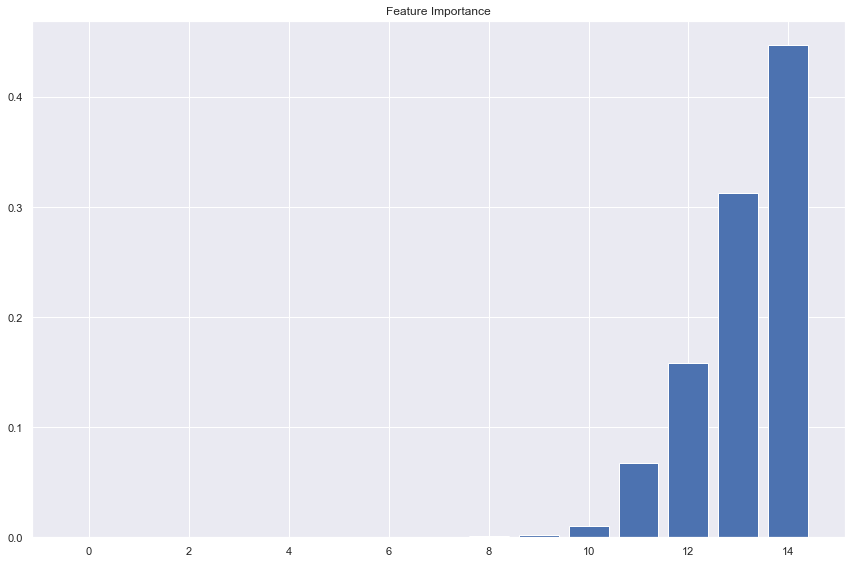

In [190]:
import matplotlib.pyplot as plt
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
#plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [191]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'actual')


Confusion Matrix
[[1861    0]
 [   0  139]] 

Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1861
        True       1.00      1.00      1.00       139

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000
 

AUC-ROC
1.0


In [192]:
clf_RF.fit(X_train_sm, y_train_sm)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=15, n_estimators=30)

In [193]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote')


Confusion Matrix
[[1861    0]
 [   0  139]] 

Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1861
        True       1.00      1.00      1.00       139

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000
 

AUC-ROC
1.0


In [86]:
# 3.ADASYN Resampling

# clf_RF.fit(X_train_ada, y_train_ada)
# clf_RF.best_estimator_

In [194]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'adasyn')


Confusion Matrix
[[1861    0]
 [   0  139]] 

Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1861
        True       1.00      1.00      1.00       139

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000
 

AUC-ROC
1.0


#### 4. SMOTE + Tomek Resampling

In [195]:

clf_RF.fit(X_train_smtom, y_train_smtom)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=13, min_samples_split=50, n_estimators=50)

In [196]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+tomek')


Confusion Matrix
[[1861    0]
 [   0  139]] 

Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1861
        True       1.00      1.00      1.00       139

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000
 

AUC-ROC
1.0


#### 5. SMOTE + ENN Resampling¶


In [197]:
clf_RF.fit(X_train_smenn, y_train_smenn)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=5, min_samples_split=20)

In [198]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+enn')


Confusion Matrix
[[1861    0]
 [   0  139]] 

Classification Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1861
        True       1.00      1.00      1.00       139

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000
 

AUC-ROC
1.0


## Model Comparision

In [199]:

clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [200]:
clf_eval_df

,model,resample,precision,recall,f1-score,AUC-ROC
0,Logistic Regression,actual,0.000000,0.0,0.000000,1.0
1,Logistic Regression,smote,0.945578,1.0,0.972028,1.0
2,Logistic Regression,smote+tomek,0.945578,1.0,0.972028,1.0
3,Logistic Regression,smote+enn,0.945578,1.0,0.972028,1.0
4,Decision Tree,actual,1.000000,1.0,1.000000,1.0
5,Decision Tree,actual,1.000000,1.0,1.000000,1.0
6,Decision Tree,smote,1.000000,1.0,1.000000,1.0
7,Decision Tree,smote+tomek,1.000000,1.0,1.000000,1.0
8,Decision Tree,smote+enn,1.000000,1.0,1.000000,1.0
9,Random Forest,actual,1.000000,1.0,1.000000,1.0


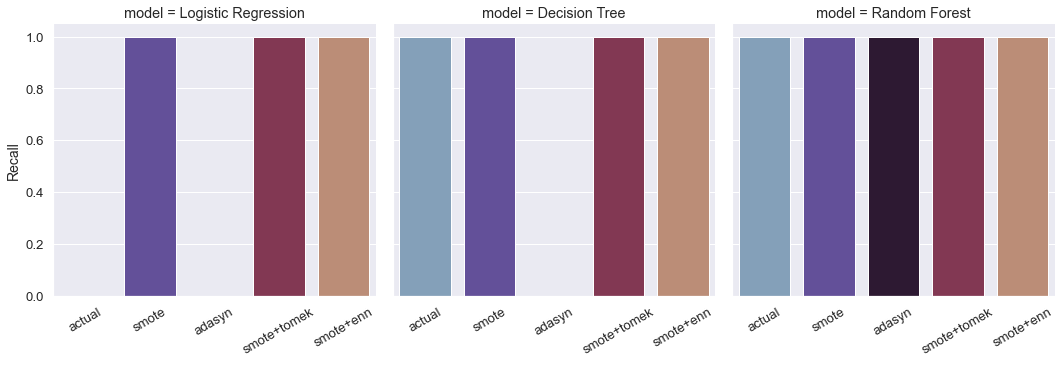

In [201]:
sns.set(font_scale=1.2)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(clf_eval_df, col="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn", "smote+tomek", "smote+enn"])
g.set_xticklabels(rotation=30)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('Recall', fontsize=14)

## End Notes

This is an imbalanced dataset and limited to binary classification problemes. therefore, i've applied resampling techniques to this data so the models perform to their best and give most accuracte predictions. 


Kindly refer the Model Comparision. I have done on Logistic Regression, Decision Tree and Random Forest. 


#### Questions to explore:
     
        
● Which features should be discarded? Why? 

       * I have dropped 'approved_for_installments', 'customer_credit_score', 'customer_id', 'customer_billing_zip', 'customer_shipping_zip','credit_decision_started_at', 'order_id' as this not caused anything with the output.  *

    
● What surprised you about the results/trends observed in the data?  

         * this is an imbalanced dataset, after resampling and tried with 3 Classification algorithm, it still Overfitting...  To bring that to best fit, we may need to increase the dataset by increasing to atleast 3 years of data to avoid overfitting. *                  


● What additional data would you like to see that might help build a better installment-approval classifier? 

          * currently this dataset has 10000 rows which may be the reason it overfitted.  we need to increase the sample of dataset by atleast 3 years so that we will rebuilt the model and gets better accuracy  and gets a best fit. *


● Which features show strong correlation with a customer’s likelihood of paying back installments? 

        * When checked the feature importance I can see customer's age, amount are all correlated with the paid installment. *
        

● What would be your next steps to train/build a model that we could use to make real time customer approval decisions?  

                * increase the sample to min 3-5 years can improve the model and that makes to move to production/cutomer approval.*

In [ ]:
how to get impo varaiblt using rf
?


10000 provide hiher df, over futting can be overcome


